# Exploring PyTorch Workflow

* Preapre Data
* Build Model
* Training Model
* Make Predictions
* Save and load model
* Putting all together

In [124]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
print(torch.__version__)

# Check if CUDA is available
print(torch.cuda.is_available())

# Check if cuDNN is enabled 
print(torch.backends.cudnn.enabled)

2.3.1+cu121
True
True


# Collecting/Preparing Data

In [4]:
# Create *Known* Parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias

x[: 10], y[: 10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Spliting data for train, validate, test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape    


(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

# Visualize the data

In [11]:
def plot(x, y,x_test,y_test, y_pred=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='y_true', color='green')
    plt.scatter(x_test, y_test, label='y_test', color='red')
    if y_pred is not None:
        plt.scatter(x, y_pred, label='y_pred', color='red')
    plt.legend()
    plt.show()



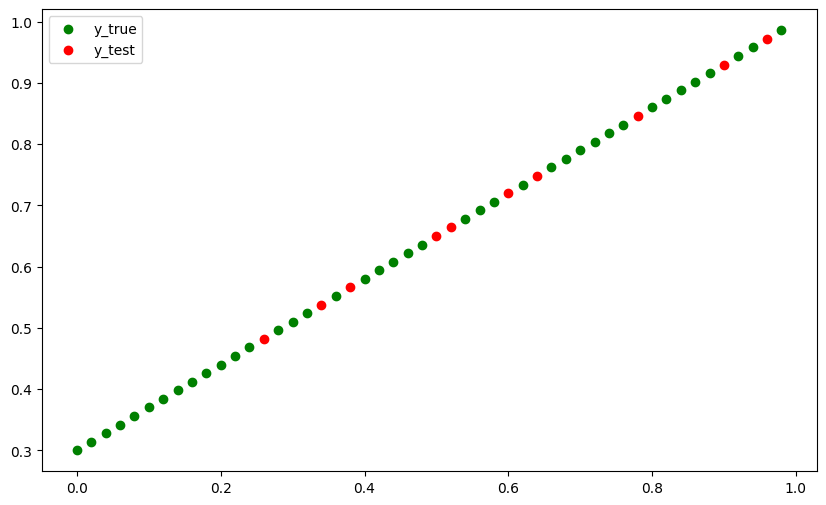

In [12]:
plot(x_train, y_train,x_test,y_test)

# Building Model


In [20]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### CHecking the content of our model

In [26]:
#creating a random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegression()
print(model_0)
print(list(model_0.parameters()))
print(model_0.state_dict())

LinearRegression()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


# Checking the model Preditive power

In [31]:
with torch.inference_mode():
    y_pred = model_0(x_test)
    print(y_pred[:5])

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433]])


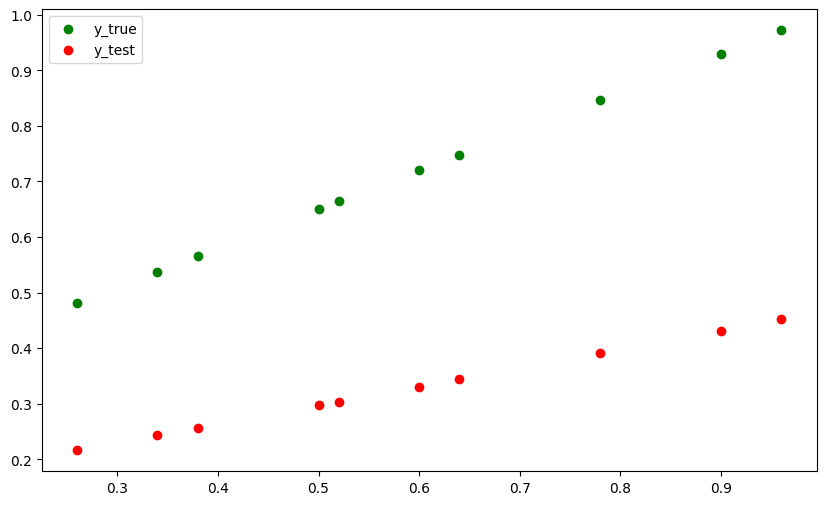

In [34]:
plot(x_test, y_test,x_test, y_pred)

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433]])


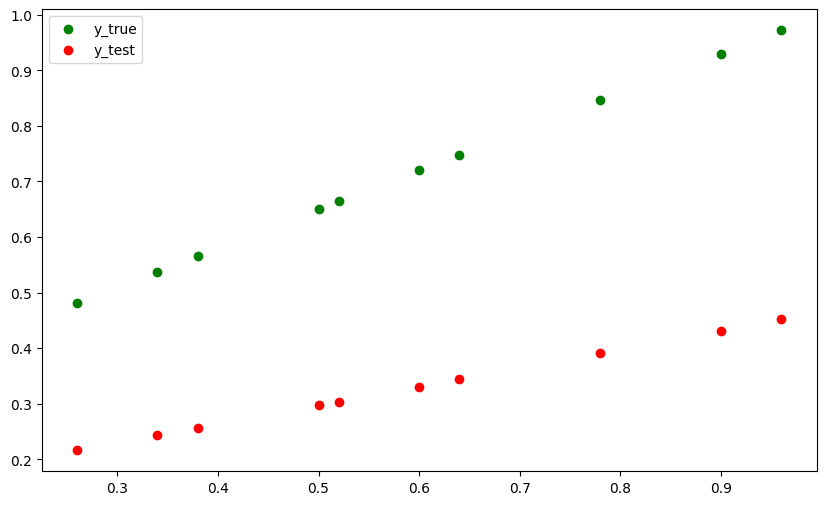

In [35]:
with torch.no_grad():
    y_pred = model_0(x_test)
    print(y_pred[:5])

plot(x_test, y_test,x_test, y_pred)

# Train the model
Model should be trained to get accurate results

### Setup loss function and Optimizer

In [38]:
# Loss Function
loss_fn = nn.MSELoss()

#Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

### Building a training loop

In [107]:
# Epochs
epochs = 1000

# Training Loop
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train()
    # Forward Pass
    y_pred = model_0(x_train)

    # Compute Loss
    loss = loss_fn(y_pred, y_train)
    print(f'Epoch {epoch + 1}, Loss: {loss}')

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backward Pass
    loss.backward()

    # Optimizer Step
    optimizer.step()


    model_0.eval() #set the model to evaluation mode/ turn off the gradient tracking

Epoch 1, Loss: 0.0011736748274415731
Epoch 2, Loss: 0.0011733380379155278
Epoch 3, Loss: 0.0011730013648048043
Epoch 4, Loss: 0.0011726644588634372
Epoch 5, Loss: 0.0011723280185833573
Epoch 6, Loss: 0.0011719914618879557
Epoch 7, Loss: 0.001171654905192554
Epoch 8, Loss: 0.0011713182320818305
Epoch 9, Loss: 0.0011709820246323943
Epoch 10, Loss: 0.0011706454679369926
Epoch 11, Loss: 0.0011703091440722346
Epoch 12, Loss: 0.0011699727037921548
Epoch 13, Loss: 0.0011696366127580404
Epoch 14, Loss: 0.0011693002888932824
Epoch 15, Loss: 0.0011689643142744899
Epoch 16, Loss: 0.001168628572486341
Epoch 17, Loss: 0.0011682925978675485
Epoch 18, Loss: 0.0011679569724947214
Epoch 19, Loss: 0.0011676211142912507
Epoch 20, Loss: 0.0011672856053337455
Epoch 21, Loss: 0.0011669498635455966
Epoch 22, Loss: 0.0011666143545880914
Epoch 23, Loss: 0.0011662787292152643
Epoch 24, Loss: 0.001165943336673081
Epoch 25, Loss: 0.0011656077113002539
Epoch 26, Loss: 0.0011652724351733923
Epoch 27, Loss: 0.001164

In [108]:
print(model_0.state_dict())

OrderedDict({'weights': tensor([0.6010]), 'bias': tensor([0.3496])})


# Predictions

tensor([[0.5059],
        [0.8184],
        [0.7103],
        [0.8906],
        [0.5540]])
Test Loss: 0.0005629863007925451


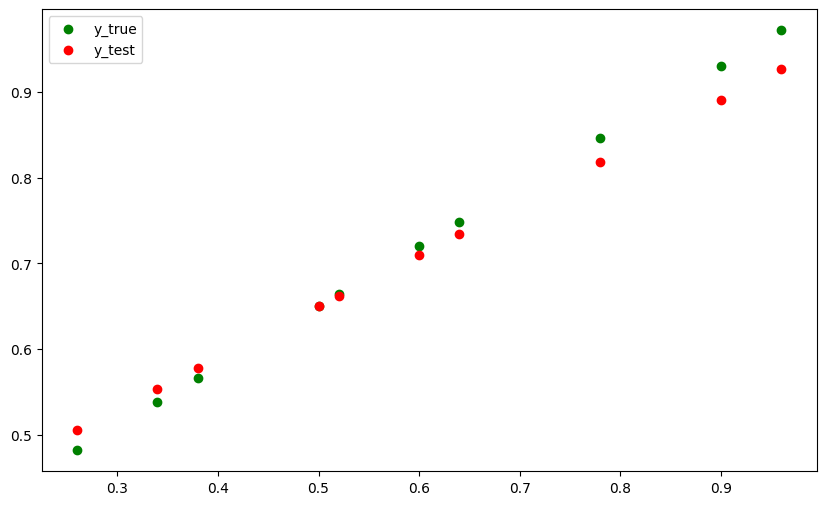

In [112]:
with torch.inference_mode():
    y_pred = model_0(x_test)
    print(y_pred[:5])
    test_loss = loss_fn(y_pred, y_test)
    print(f'Test Loss: {test_loss}')

plot(x_test, y_test,x_test, y_pred)

tensor([[0.5059],
        [0.8184],
        [0.7103],
        [0.8906],
        [0.5540]])
Test Loss: 0.0005629863007925451


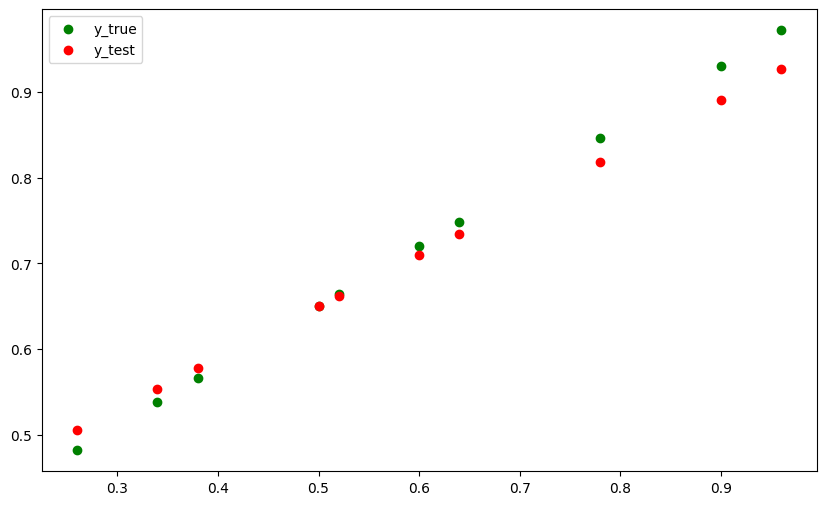

In [113]:
with torch.no_grad():
    y_pred = model_0(x_test)
    print(y_pred[:5])
    test_loss = loss_fn(y_pred, y_test)
    print(f'Test Loss: {test_loss}')

plot(x_test, y_test,x_test, y_pred)

# Testing Loop

In [117]:
# Epochs
epochs = 101

epoch_count = []
loss_values = []
test_loss_values = []

# Training Loop
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train()
    # Forward Pass
    y_pred = model_0(x_train)

    # Compute Loss
    loss = loss_fn(y_pred, y_train)

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backward Pass
    loss.backward()

    # Optimizer Step
    optimizer.step()

    #Set the model to evaluation mode
    model_0.eval() #set the model to evaluation mode/ turn off the gradient tracking
    with torch.inference_mode():
        y_pred = model_0(x_test)
        test_loss = loss_fn(y_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch {epoch } | Train Loss: {loss} | Test Loss: {test_loss}') 
        print(model_0.state_dict())

Epoch 0 | Train Loss: 0.0008313166908919811 | Test Loss: 0.0005313846049830317
OrderedDict({'weights': tensor([0.6039]), 'bias': tensor([0.3482])})
Epoch 10 | Train Loss: 0.0008289288962259889 | Test Loss: 0.0005298556061461568
OrderedDict({'weights': tensor([0.6040]), 'bias': tensor([0.3481])})
Epoch 20 | Train Loss: 0.0008265523938462138 | Test Loss: 0.0005283377831801772
OrderedDict({'weights': tensor([0.6041]), 'bias': tensor([0.3481])})
Epoch 30 | Train Loss: 0.0008241796749643981 | Test Loss: 0.0005268218810670078
OrderedDict({'weights': tensor([0.6043]), 'bias': tensor([0.3480])})
Epoch 40 | Train Loss: 0.000821811961941421 | Test Loss: 0.0005253053968772292
OrderedDict({'weights': tensor([0.6044]), 'bias': tensor([0.3479])})
Epoch 50 | Train Loss: 0.0008194561814889312 | Test Loss: 0.0005238010780885816
OrderedDict({'weights': tensor([0.6045]), 'bias': tensor([0.3479])})
Epoch 60 | Train Loss: 0.0008171037770807743 | Test Loss: 0.0005222990876063704
OrderedDict({'weights': tens

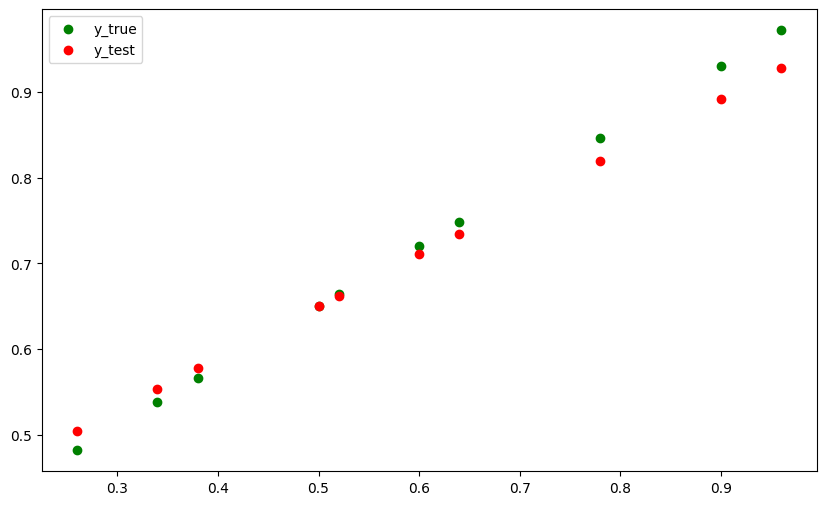

In [118]:
plot(x_test, y_test,x_test, y_pred)

In [130]:
np.array(epoch_count)
loss_values.detach()
np.array(test_loss_values)

AttributeError: 'list' object has no attribute 'detach'

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

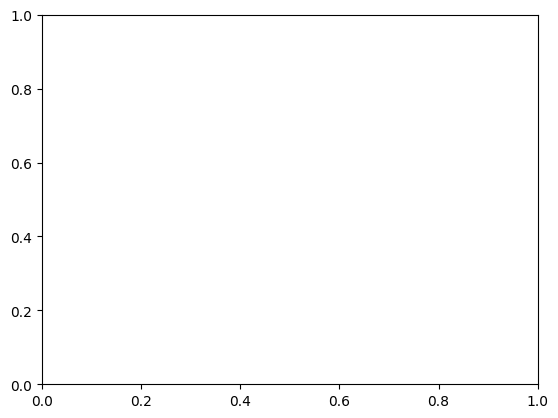

In [120]:
plt.plot(epoch_count, loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Train and Test Loss')
plt.legend()